In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('font', family='NanumBarunGothic')

In [2]:
# 201501~202305 데이터가 저장된 .csv 파일을 Pandas에 인식하여 DataFrame으로 변환
station_data = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv',encoding='EUC-KR')

In [3]:
# 데이터 행과 열 개수 확인
print(station_data.shape)

# 데이터 정보 확인
print(station_data.info())

(59408, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59408 entries, 0 to 59407
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           59408 non-null  int64 
 1   호선명           59408 non-null  object
 2   지하철역          59408 non-null  object
 3   04시-05시 승차인원  59408 non-null  int64 
 4   04시-05시 하차인원  59408 non-null  int64 
 5   05시-06시 승차인원  59408 non-null  int64 
 6   05시-06시 하차인원  59408 non-null  int64 
 7   06시-07시 승차인원  59408 non-null  int64 
 8   06시-07시 하차인원  59408 non-null  int64 
 9   07시-08시 승차인원  59408 non-null  int64 
 10  07시-08시 하차인원  59408 non-null  int64 
 11  08시-09시 승차인원  59408 non-null  int64 
 12  08시-09시 하차인원  59408 non-null  int64 
 13  09시-10시 승차인원  59408 non-null  int64 
 14  09시-10시 하차인원  59408 non-null  int64 
 15  10시-11시 승차인원  59408 non-null  int64 
 16  10시-11시 하차인원  59408 non-null  int64 
 17  11시-12시 승차인원  59408 non-null  int64 
 18  11시-12시 하차인원  59408 non-null  int6

In [4]:
# 승차 데이터 확인
in_station = station_data.columns.tolist()[:3]
for a in station_data.columns.tolist():
  if a.find('승차') != -1:
    in_station.append(a)

in_station_df = station_data[in_station]
in_station_df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
0,202305,1호선,동대문,900,12331,9806,14774,20435,19842,18720,...,24514,18427,16221,14994,11946,5375,555,2,0,0
1,202305,1호선,동묘앞,211,3197,3753,7379,11582,10643,11998,...,23341,12072,7353,5279,4344,1367,88,1,0,0
2,202305,1호선,서울역,708,8611,13730,43711,74850,65578,65755,...,221468,119553,84794,85979,58561,25581,2631,0,0,0
3,202305,1호선,시청,90,2505,4137,8198,10841,13630,16041,...,161267,64613,57539,51046,32944,10711,354,0,0,0
4,202305,1호선,신설동,468,9034,10317,22069,31629,21778,18070,...,51406,22176,15549,13344,9529,4099,471,1,0,0


In [5]:
# 승차 데이터 인원 통합 진행 간 불필요한 데이터 삭제 (지하철역, 사용월)
in_station_sorting = in_station_df.drop(['사용월', '지하철역'],axis=1)

# 승차 데이터 호선 별 전체 인원 통합
in_station_sorting = in_station_sorting.groupby(['호선명']).sum()
in_station_sorting

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
호선명,,,,,,,,,,,,,,,,,,,,,
1호선,389709,6561081,7922332,17722317,26418451,22770952,25055379,32812076,39331875,45097084,...,101879485,57316692,42505655,43012411,32422626,13650702,1255541,19286,232,18
2호선,1348311,50775078,89729908,236620701,325935252,219585229,156912953,161589605,179662583,198643450,...,500878255,300061158,233001375,238295554,204486119,91269795,12742955,83148,12041,537
3호선,189625,14543085,34537977,93532210,115398000,77788607,64106824,67377639,74183063,80015267,...,179278863,106638410,82395946,74824415,58632828,20891813,2325674,14236,1235,13
4호선,396515,20612451,46621196,118239761,131484801,88443083,69774748,70488728,77227125,81375133,...,155713224,93145616,75439219,71857283,61028486,27604802,3480496,18400,377,83
5호선,76063,24533402,56077344,163226682,188379394,101096575,74461792,74211898,79937178,82277977,...,187819219,96794973,72390784,68426257,53283464,20152078,2326078,19978,2235,2
6호선,160963,16265422,32004834,87821704,106716307,61175488,43999350,43068320,47103024,48248174,...,87257829,52618179,39732917,40917945,36463891,18012761,2398520,13281,276,2
7호선,215742,33716349,67705132,181769697,215590618,125555548,85909053,82442763,88776205,90959678,...,196524547,117382919,85115034,79662202,63344369,27597454,3893470,17892,134,9
8호선,20789,8477736,17607868,48193347,62290425,34945750,23448614,22456058,24169199,24744034,...,50044455,26775764,20102266,18303671,14052343,5310678,764720,5401,28,15
9호선,45557,9862330,22203727,60942823,68602846,40757311,31229062,32271884,35197739,37225768,...,84578741,45912896,35155782,34672808,30056173,11972610,1631929,7730,66,22


In [6]:
# 가장 승차자가 많은 지하철 호선 계산
in_station_sorting.style.background_gradient()

# 여기서의 결과로 2호선이 전체적인 시간대에서 가장 많은 사람이 탑승한다는 것을 알 수 있음

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
호선명,,,,,,,,,,,,,,,,,,,,,,,,
1호선,389709,6561081,7922332,17722317,26418451,22770952,25055379,32812076,39331875,45097084,48053175,56039817,60534948,72970610,101879485,57316692,42505655,43012411,32422626,13650702,1255541,19286,232,18
2호선,1348311,50775078,89729908,236620701,325935252,219585229,156912953,161589605,179662583,198643450,201201666,224095612,258605436,339840105,500878255,300061158,233001375,238295554,204486119,91269795,12742955,83148,12041,537
3호선,189625,14543085,34537977,93532210,115398000,77788607,64106824,67377639,74183063,80015267,82694973,92017917,106099966,133226318,179278863,106638410,82395946,74824415,58632828,20891813,2325674,14236,1235,13
4호선,396515,20612451,46621196,118239761,131484801,88443083,69774748,70488728,77227125,81375133,83060509,90815184,103727328,125064709,155713224,93145616,75439219,71857283,61028486,27604802,3480496,18400,377,83
5호선,76063,24533402,56077344,163226682,188379394,101096575,74461792,74211898,79937178,82277977,79999280,87037308,101452555,130630882,187819219,96794973,72390784,68426257,53283464,20152078,2326078,19978,2235,2
6호선,160963,16265422,32004834,87821704,106716307,61175488,43999350,43068320,47103024,48248174,46351515,50258620,59096281,69763376,87257829,52618179,39732917,40917945,36463891,18012761,2398520,13281,276,2
7호선,215742,33716349,67705132,181769697,215590618,125555548,85909053,82442763,88776205,90959678,88830170,96448440,110821833,140287817,196524547,117382919,85115034,79662202,63344369,27597454,3893470,17892,134,9
8호선,20789,8477736,17607868,48193347,62290425,34945750,23448614,22456058,24169199,24744034,24023418,26113660,30292828,37827286,50044455,26775764,20102266,18303671,14052343,5310678,764720,5401,28,15
9호선,45557,9862330,22203727,60942823,68602846,40757311,31229062,32271884,35197739,37225768,36171492,39138821,44950020,61165834,84578741,45912896,35155782,34672808,30056173,11972610,1631929,7730,66,22


In [7]:
# 그렇다면 각 호선의 역 별 사용자 수를 한번 확인해보고자 함
# 승차 데이터 인원 통합 진행 간 불필요한 데이터 삭제 (사용월)
in_station_sorting = in_station_df.drop(['사용월'],axis=1)

# 승차 데이터 호선 별 전체 인원 통합
in_station_sorting = in_station_sorting.groupby(['호선명', '지하철역']).sum()
in_station_sorting

04시-05시 승차인원  05시-06시 승차인원  06시-07시 승차인원  07시-08시 승차인원  \
호선명 지하철역                                                           
1호선 동대문          62755       1376548       1065367       1686414   
    동묘앞          12334        308916        358844        663812   
    서울역          92093       1068719       1375872       4075979   
    시청            6826        222972        351390        716416   
    신설동          28463        856507        971503       2033505   
...                ...           ...           ...           ...   
중앙선 원덕            3905         32465         58569         95066   
    중랑           10549        596636        984415       2380937   
    지평              36            20          2093         22500   
    팔당             213         23175         62470        154306   
    회기           74226       1176436       2223357       6107993   

          08시-09시 승차인원  09시-10시 승차인원  10시-11시 승차인원  11시-12시 승차인원  \
호선명 지하철역                                                           
1호선 동대문        2268478       2167975       1975578       2127859   
    동묘앞         934833        866969        988131       1435191   
    서울역        7360996       5967967       6144056       7697884   
    시청          932983       1148809       1429195       2004807   
    신설동        2819797       2059051       1881602       2156611   
...                ...           ...           ...           ...   
중앙선 원덕          110802        102820         98368         72605   
    중랑         2348059       1437958       1034687        911005   
    지평           17012           291         23324            92   
    팔당          135988        113839        115116        113580   
    회기         7746322       4995283       3954820       4095826   

          12시-13시 승차인원  13시-14시 승차인원  ...  18시-19시 승차인원  19시-20시 승차인원  \
호선명 지하철역                              ...                               
1호선 동대문        2608769       2844763  ...       3038693       2170875   
    동묘앞        1991700       2605028  ...       2687968       1342711   
    서울역        8789785       8789486  ...      21653493      12267965   
    시청         2237473       2808926  ...      14314832       6779713   
    신설동        2322796       2551777  ...       6167334       2840559   
...                ...           ...  ...           ...           ...   
중앙선 원덕           70551         77398  ...         68690         40476   
    중랑          925798        918401  ...        813596        562546   
    지평             127          2378  ...          2990         11071   
    팔당          128362        161803  ...        277779        203858   
    회기         4510285       4542536  ...       6005458       3677984   

          20시-21시 승차인원  21시-22시 승차인원  22시-23시 승차인원  23시-24시 승차인원  \
호선명 지하철역                                                           
1호선 동대문        1737069       1604730       1354639        685980   
    동묘앞         759380        639230        439157        194406   
    서울역        8672512       9030723       6557608       2925218   
    시청         5391946       5393154       3546920       1241409   
    신설동        1811101       1647234       1204406        485446   
...                ...           ...           ...           ...   
중앙선 원덕           21509         12029          5510          2197   
    중랑          401019        348625        252946        118604   
    지평             782           772           292             1   
    팔당          162253        139957         77933         17604   
    회기         3128596       3291357       3018197       1610117   

          00시-01시 승차인원  01시-02시 승차인원  02시-03시 승차인원  03시-04시 승차인원  
호선명 지하철역                                                          
1호선 동대문          72119           846            16             0  
    동묘앞          19197           226            15            15  
    서울역         337951          3861            20             1  
    시청           84316          1697            19             0  
   

In [8]:
# 2호선 내 가장 많은 인원이 사용하는 역을 확인
in_station_sorting.loc['2호선'].style.background_gradient()

# 강남역에서 가장 많은 시간대에서 승차 인원이 높게 나타남

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,23736,1342158,2279384,4509191,7186930,6066878,6007089,8032491,10224613,13099541,13508392,16216119,18394676,24594629,35799164,24455338,19570171,23955553,24048267,10258160,1636188,5799,748,42
강변,1097,227057,706989,2262178,3335419,2396382,1993318,1909531,1843474,1841481,1732728,1749474,1827299,2048085,2149561,1873283,1580213,1390824,1068367,445844,62939,371,7,0
강변(동서울터미널),2141,729899,2243080,6864148,10028433,7409393,5782787,5401375,5221773,5093445,4739794,4798450,5055074,5628107,6175716,4900974,3945471,3383202,2388218,919649,112492,1245,72,0
건대입구,35493,1931822,2556578,6083782,10360267,6853154,4178972,4080520,4801475,5357656,5461835,5996122,6863568,8100517,9549718,7604661,7728149,8944642,8954738,5216884,786238,4034,275,19
교대,399,76716,322339,677569,944746,804951,796992,960400,1005637,1275340,1370038,1504885,1553552,2031181,3344419,1899136,1424376,1639074,1813636,630107,111481,315,13,0
교대(법원.검찰청),1850,217478,1032055,2106288,3064686,2513168,2378108,2892007,3121924,3877099,4419868,4854738,5133582,7515761,11844215,5940992,4611965,5155852,4531487,1606968,260194,784,88,3
구로디지털단지,23901,4084899,5567162,14696126,19201322,12105830,7385565,6632486,7085377,7350527,6655379,6880916,8050117,11948414,22952722,13113159,7886570,6888848,5443526,2502823,350125,1721,103,8
구의,560,284458,566322,1538992,2375806,1363772,810834,746783,724780,758149,697157,686916,722481,860192,1103477,629209,481591,448771,390084,204564,33545,171,5,0
구의(광진구청),2867,1053190,2035655,5387620,9038311,5246613,2827110,2433212,2503346,2530511,2288134,2252935,2564493,2881646,3557441,1956222,1511194,1445539,1245086,644763,86308,560,53,4


In [9]:
# 그렇다면 2호선 내에서 시간을 불문하고 가장 많은 사람이 승차하는 역은 어디인지 계산해본다
# 승차 데이터 인원 통합 진행 간 불필요한 데이터 삭제 (사용월)
in_station_sorting = in_station_df.drop(['사용월'],axis=1)

# 승차 데이터 호선 별 전체 인원 통합
in_station_sorting['총 탑승자'] = in_station_sorting.sum(axis=1)
in_station_sorting = in_station_sorting.groupby(['호선명', '지하철역']).sum()
in_station_sorting.loc['2호선', '총 탑승자'].to_frame().style.background_gradient()

# 이로써 2호선 전체 승차 수 중 가장 많은 수를 차지하는 것은 강남역이었던 것을 파악할 수 있다

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_236004\462753612.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  in_station_sorting['총 탑승자'] = in_station_sorting.sum(axis=1)


,총 탑승자
지하철역,
강남,271215257
강변,32445921
강변(동서울터미널),90824938
건대입구,121451119
교대,24187302
교대(법원.검찰청),77081160
구로디지털단지,176807626
구의,15428619
구의(광진구청),53492813


<Axes: xlabel='지하철역'>

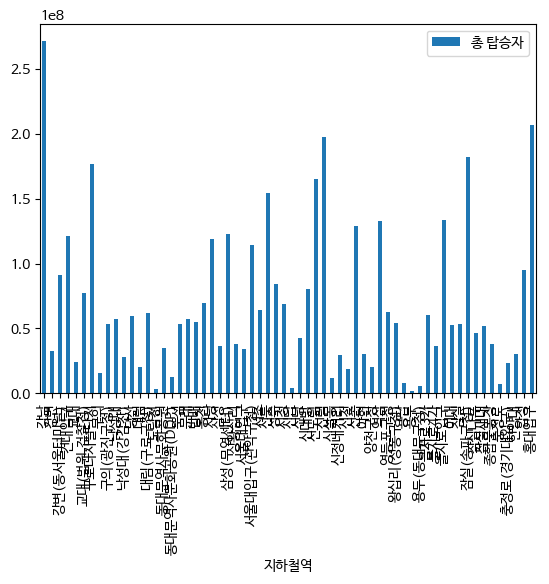

In [10]:
# 총 탑승자에 대한 데이터를 시각화하여 바 형 그래프로 표기
in_station_sorting.loc['2호선', '총 탑승자'].to_frame().plot(kind='bar')

In [11]:
# 하차 데이터 확인
out_station = station_data.columns.tolist()[:3]
for a in station_data.columns.tolist():
  if a.find('하차') != -1:
    out_station.append(a)

out_station_df = station_data[out_station]
out_station_df.head()

,사용월,호선명,지하철역,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
0,202305,1호선,동대문,25,2188,7379,13998,22506,24103,25631,...,22067,21782,14909,13765,11492,9301,2688,267,0,0
1,202305,1호선,동묘앞,2,1140,5206,10573,22916,18105,22700,...,12254,8518,6198,6354,7042,4201,1706,282,0,0
2,202305,1호선,서울역,37,9912,57527,114851,231336,158131,79625,...,96309,65443,49116,43530,29390,15133,2693,228,0,0
3,202305,1호선,시청,3,4754,24662,75913,197338,92068,47494,...,27054,14185,9360,8940,6666,4344,933,25,0,0
4,202305,1호선,신설동,15,2536,8883,25111,56756,33982,22029,...,31296,22180,15261,15088,13182,9866,2168,1,0,0


In [12]:
# 하차 데이터 인원 통합 진행 간 불필요한 데이터 삭제 (지하철역, 사용월)
out_station_sorting = out_station_df.drop(['사용월', '지하철역'],axis=1)

# 하차 데이터 호선 별 전체 인원 통합
out_station_sorting = out_station_sorting.groupby(['호선명']).sum()
out_station_sorting

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
호선명,,,,,,,,,,,,,,,,,,,,,
1호선,10739,3524647,17006681,43675029,104797249,68493135,47129131,48504298,49479284,51159932,...,43529323,31371339,18432633,15557839,13370029,8599232,2600283,87391,2337,0
2호선,20239,14218089,81280436,199018890,504134088,355967643,206283767,185870576,192007072,213117138,...,393267524,322136714,193378274,178675022,171155916,107832518,31445615,1845508,32739,4188
3호선,8952,3799904,35062096,82837885,179431687,131104107,86167908,78451132,77234937,83310756,...,132740243,107424092,64050183,56136589,51883675,31650817,8917028,313872,5090,320
4호선,14893,3718888,29316594,65489914,154934953,109395378,79985987,77419976,79576358,85357383,...,146609418,130922465,80615072,70977799,65498374,43642907,12013114,473381,5159,161
5호선,1678,5186422,36223645,87789738,208741004,107507814,68172001,66687753,70918294,79100829,...,176124392,149277868,87641061,78531734,74288039,46418260,13560623,429816,7553,204
6호선,2812,3560670,16987496,37764410,94394743,58346455,41970518,38920710,42056205,46983013,...,98768756,87755101,52833567,47017238,45952523,32316730,9399418,316209,3159,6
7호선,3650,7241215,37906079,85965663,223844763,148134141,86358775,75442589,78072334,85436362,...,185928972,172381642,104047505,92896642,85630662,55913408,17693615,726686,6227,1
8호선,516,2358545,11680285,22101294,55304858,32498428,20639559,19775493,21364755,23408350,...,53731597,45255020,27591463,25320961,23368299,13907003,3914111,243085,1908,15
9호선,618,2455170,17194514,43625905,86522590,49319758,32109701,31044088,33034345,36828095,...,75047180,64452501,38810696,34413053,33300692,21317330,5797504,230621,1246,10


In [13]:
# 가장 하차자가 많은 지하철 호선 계산
out_station_sorting.style.background_gradient()

# 승차자와 마찬가지로 2호선이 가장 많은 사람이 하차한다는 것을 알 수 있음

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
호선명,,,,,,,,,,,,,,,,,,,,,,,,
1호선,10739,3524647,17006681,43675029,104797249,68493135,47129131,48504298,49479284,51159932,47688776,43443819,39946775,40182312,43529323,31371339,18432633,15557839,13370029,8599232,2600283,87391,2337,0
2호선,20239,14218089,81280436,199018890,504134088,355967643,206283767,185870576,192007072,213117138,204916892,211300859,229890172,281232483,393267524,322136714,193378274,178675022,171155916,107832518,31445615,1845508,32739,4188
3호선,8952,3799904,35062096,82837885,179431687,131104107,86167908,78451132,77234937,83310756,81787688,82805932,88185657,101467530,132740243,107424092,64050183,56136589,51883675,31650817,8917028,313872,5090,320
4호선,14893,3718888,29316594,65489914,154934953,109395378,79985987,77419976,79576358,85357383,84698452,86648514,93555322,110226961,146609418,130922465,80615072,70977799,65498374,43642907,12013114,473381,5159,161
5호선,1678,5186422,36223645,87789738,208741004,107507814,68172001,66687753,70918294,79100829,77925203,83122820,95079636,117015617,176124392,149277868,87641061,78531734,74288039,46418260,13560623,429816,7553,204
6호선,2812,3560670,16987496,37764410,94394743,58346455,41970518,38920710,42056205,46983013,45408509,48670319,56442185,68299270,98768756,87755101,52833567,47017238,45952523,32316730,9399418,316209,3159,6
7호선,3650,7241215,37906079,85965663,223844763,148134141,86358775,75442589,78072334,85436362,84189665,90196203,102428033,127250093,185928972,172381642,104047505,92896642,85630662,55913408,17693615,726686,6227,1
8호선,516,2358545,11680285,22101294,55304858,32498428,20639559,19775493,21364755,23408350,23526390,26182044,29809160,36426391,53731597,45255020,27591463,25320961,23368299,13907003,3914111,243085,1908,15
9호선,618,2455170,17194514,43625905,86522590,49319758,32109701,31044088,33034345,36828095,35761995,37663811,41890619,51479891,75047180,64452501,38810696,34413053,33300692,21317330,5797504,230621,1246,10


In [14]:
# 그렇다면 각 호선의 역 별 하차자 수를 한번 확인해보고자 함
# 하차 데이터 인원 통합 진행 간 불필요한 데이터 삭제 (사용월)
out_station_sorting = out_station_df.drop(['사용월'],axis=1)

# 하차 데이터 호선 별 전체 인원 통합
out_station_sorting = out_station_sorting.groupby(['호선명', '지하철역']).sum()
out_station_sorting

04시-05시 하차인원  05시-06시 하차인원  06시-07시 하차인원  07시-08시 하차인원  \
호선명 지하철역                                                           
1호선 동대문           1195        216765        769197       1389821   
    동묘앞            296         88636        414784       1015227   
    서울역           3020        819208       4775646      10339577   
    시청             264        433695       2164828       6873927   
    신설동           1295        246209        891648       2674675   
...                ...           ...           ...           ...   
중앙선 원덕             207           809         15248         42989   
    중랑             257         50128        229325        342511   
    지평              16             3          1176         17277   
    팔당               6          9713         54220        123552   
    회기             806        369325       1286445       3028727   

          08시-09시 하차인원  09시-10시 하차인원  10시-11시 하차인원  11시-12시 하차인원  \
호선명 지하철역                                                           
1호선 동대문        2876798       2828106       2830502       3242955   
    동묘앞        2600226       1815251       1930840       2583519   
    서울역       21309164      13770535       7705499       6916163   
    시청        17714535       8009118       4147068       3968296   
    신설동        6917928       3888806       2407777       2168155   
...                ...           ...           ...           ...   
중앙선 원덕           64026         67619         91838         90212   
    중랑          687496        529899        503091        513191   
    지평           16226            39         25744           123   
    팔당          226038        380611        347266        295418   
    회기         6338822       4352510       3867744       3505559   

          12시-13시 하차인원  13시-14시 하차인원  ...  18시-19시 하차인원  19시-20시 하차인원  \
호선명 지하철역                              ...                               
1호선 동대문        3290799       3207886  ...       2755700       2831550   
    동묘앞        2939407       3295631  ...       1180779        837446   
    서울역        7544671       7725719  ...       9661522       7155866   
    시청         3712098       3971125  ...       2711646       1545419   
    신설동        2125521       2231389  ...       2891390       2291492   
...                ...           ...  ...           ...           ...   
중앙선 원덕           75284         44655  ...         88209         74872   
    중랑          606084        660420  ...       2106709       1873982   
    지평              35          3989  ...          5664         16542   
    팔당          250244        166217  ...        162174        119359   
    회기         3664913       3965476  ...       7610464       6977189   

          20시-21시 하차인원  21시-22시 하차인원  22시-23시 하차인원  23시-24시 하차인원  \
호선명 지하철역                                                           
1호선 동대문        2079974       1669010       1521796       1253476   
    동묘앞         586357        580844        613546        409396   
    서울역        5021398       4426083       3491438       1833496   
    시청          851517        728411        558400        339470   
    신설동        1514067       1454942       1395387        966969   
...                ...           ...           ...           ...   
중앙선 원덕           51599         65878         45398         36845   
    중랑         1201347       1005914        973514        558514   
    지평             306          3128          1642             4   
    팔당           61843         54074         47273         30082   
    회기         4451292       4467643       4461349       3060037   

          00시-01시 하차인원  01시-02시 하차인원  02시-03시 하차인원  03시-04시 하차인원  
호선명 지하철역                                                          
1호선 동대문         366453          7564           232             0  
    동묘앞         264858         20535           756             0  
    서울역         575465         41054           741             0  
    시청           94931          2439           113             0  
   

In [15]:
# 2호선 내 가장 많은 인원이 하차하는 역을 확인
out_station_sorting.loc['2호선'].style.background_gradient()

# 강남역에서 가장 많은 시간대에서 하차 인원이 높게 나타남

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,713,1234770,5757058,16814313,33646932,33669147,16693220,13455281,13372941,16070299,14046885,13229603,13693003,16661429,23159541,17152614,8143232,6266605,5287287,3277792,846184,18281,1217,141
강변,47,100760,848292,998516,1478059,1385237,1286228,1319337,1444569,1669037,1816167,2031146,2235070,2470776,3253615,2965518,2063561,1859876,1778929,1010556,247779,2649,68,0
강변(동서울터미널),90,253878,2175822,2544878,4218733,3812271,3597597,3550041,4021443,4572119,4959190,5710834,6321773,7393686,10263342,8123818,5489536,4846178,4491000,2378550,511726,9350,463,40
건대입구,1114,200780,1772373,2783470,6961611,5347308,4752456,5107682,6175781,6904031,6896162,7387971,8595723,11414788,17089902,13822419,8038163,7177537,6539753,4003560,1268558,98880,1544,141
교대,13,135718,673532,1602715,3560809,3236002,1667820,1480407,1345627,1495628,1422097,1311210,1298670,1460091,1884109,1438057,815506,721746,697837,406161,113575,884,101,0
교대(법원.검찰청),63,565678,2149129,4757238,12403638,11415323,5673229,4831343,4437824,4877398,4504777,4145181,4189358,5042609,6387055,4176176,2317271,2070108,1946259,1089082,258310,3420,388,49
구로디지털단지,811,611941,2242547,7811809,26290090,15367540,6287830,5176038,5249221,6385471,6701080,7264136,8211780,11153673,16478587,14916821,9620279,9700365,9877173,5988067,1403770,28154,867,75
구의,54,32670,262247,366812,1050311,697565,536159,492784,534575,628464,668659,782069,863684,1055372,1578855,1550683,1060609,1022997,1052160,625778,214623,2858,82,0
구의(광진구청),135,106973,931168,1226148,3189208,2023458,1623156,1601589,1806340,2052917,2196959,2705372,3129087,4183574,6841856,5533861,3608131,3538492,3370568,1900679,520605,10951,440,47


In [16]:
# 그렇다면 2호선 내에서 시간을 불문하고 가장 많은 사람이 하차하는 역은 어디인지 계산해본다
# 하차 데이터 인원 통합 진행 간 불필요한 데이터 삭제 (사용월)
out_station_sorting = out_station_df.drop(['사용월'],axis=1)

# 하차 데이터 호선 별 전체 인원 통합
out_station_sorting['총 하차자'] = out_station_sorting.sum(axis=1)
out_station_sorting = out_station_sorting.groupby(['호선명', '지하철역']).sum()
out_station_sorting.loc['2호선', '총 하차자'].to_frame().style.background_gradient()

# 이로써 2호선 전체 하차 수 중 가장 많은 수를 차지하는 것은 강남역이었던 것을 파악할 수 있다

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_236004\4044090788.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  out_station_sorting['총 하차자'] = out_station_sorting.sum(axis=1)


,총 하차자
지하철역,
강남,272498488
강변,32265792
강변(동서울터미널),89246358
건대입구,132341707
교대,26768315
교대(법원.검찰청),87240906
구로디지털단지,176768125
구의,15080070
구의(광진구청),52101714


<Axes: xlabel='지하철역'>

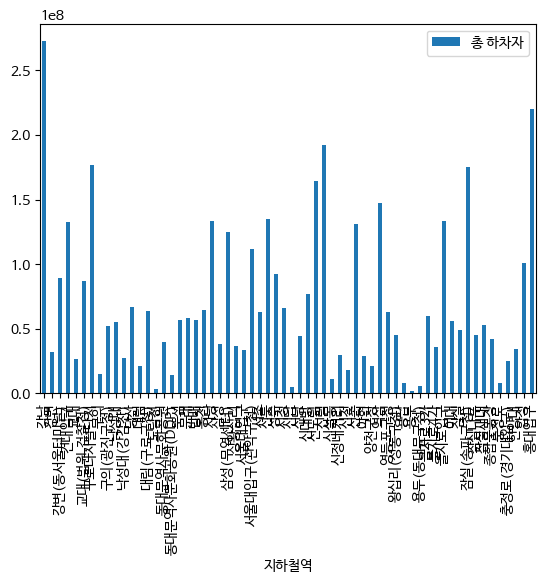

In [17]:
# 총 하차자에 대한 데이터를 시각화하여 바 형 그래프로 표기
out_station_sorting.loc['2호선', '총 하차자'].to_frame().plot(kind='bar')

In [18]:
# 그럼 해당 데이터는 데이터 간격이 너무 크기 때문에 익월에 대한 추측을 진행하기에는 정확도 문제가 존재
# 또한 데이터에 대한 추측을 위해 사용되는 특성 값이 존재하지 않기 때문에 요일과 휴일에 대한 기재가 필요함
# 우선 추측을 위해 공공 데이터 중 2022년도 일별 역별 시간대별로 승하차인원이 정리된 데이터를 가져온다.
day_station_data = pd.read_csv('서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv',encoding='EUC-KR')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_236004\492936321.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  day_station_data = pd.read_csv('서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv',encoding='EUC-KR')


In [19]:
# 전체적인 데이터 추측을 진행하기에는 데이터가 분석 및 추측 간에 많은 시간이 소요될 것을 염두하여 2호선만 진행한다.
day_station_data = day_station_data[day_station_data['호선'] == 2]

In [20]:
# 데이터 행과 열 개수 확인
print(day_station_data.shape)

# 데이터 정보 확인
print(day_station_data.info())
# 확인 시 다른 컬럼의 경우 모두 36,500개의 데이터가 있으나 24시 이후의 경우 21,400개의 데이터만 존재한다.

# Null 값에 대한 여부 확인을 위해 isnull인 상태의 값을 모두 더해 컬럼 별로 표기했을 때 총 24시간이후 컬럼에 15,100개의 데이터가 Null인 점 확인된다.
print(pd.isnull(day_station_data).sum())
# 여기서 Null 값은 당시에 운행 시간 종료 등으로 인해 승차 또는 하차한 손님이 없는 경우에만 데이터가 표기된다.

# 이에 따라 Null 데이터의 경우 0으로 간주하고 초기화를 진행한다.
day_station_data.fillna(0, inplace=True)

# 이후 결측치를 확인하면 아래와 같이 0개로 확인된다.
print(pd.isnull(day_station_data).sum())

(36500, 26)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36500 entries, 20 to 198655
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연번            36500 non-null  int64  
 1   수송일자          36500 non-null  object 
 2   호선            36500 non-null  int64  
 3   고유역번호(외부역코드)  36500 non-null  object 
 4   역명            36500 non-null  object 
 5   승하차구분         36500 non-null  object 
 6   06시이전         36500 non-null  int64  
 7   06-07시간대      36500 non-null  int64  
 8   07-08시간대      36500 non-null  int64  
 9   08-09시간대      36500 non-null  int64  
 10  09-10시간대      36500 non-null  int64  
 11  10-11시간대      36500 non-null  int64  
 12  11-12시간대      36500 non-null  int64  
 13  12-13시간대      36500 non-null  int64  
 14  13-14시간대      36500 non-null  int64  
 15  14-15시간대      36500 non-null  int64  
 16  15-16시간대      36500 non-null  int64  
 17  16-17시간대      36500 non-null  int64  
 18  17-18시간대    

In [21]:
# 변경한 데이터 출력
day_station_data

,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
20,21,2022-01-01,2,201,시청,승차,16,36,55,100,...,389,443,424,385,240,358,359,115,19,0.0
21,22,2022-01-01,2,201,시청,하차,9,88,196,209,...,249,223,196,161,84,103,130,65,23,0.0
22,23,2022-01-01,2,202,을지로입구,승차,41,39,79,124,...,796,977,1377,1200,922,985,1094,417,63,0.0
23,24,2022-01-01,2,202,을지로입구,하차,38,156,220,707,...,828,837,861,649,328,245,403,176,69,0.0
24,25,2022-01-01,2,203,을지로3가,승차,24,36,72,70,...,409,395,497,475,377,581,689,212,41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198651,198652,2022-12-31,2,248,양천구청,하차,34,46,70,118,...,272,398,398,346,300,232,264,286,183,47.0
198652,198653,2022-12-31,2,249,신정네거리,승차,193,192,306,424,...,458,468,377,305,223,180,139,155,53,13.0
198653,198654,2022-12-31,2,249,신정네거리,하차,32,88,102,197,...,446,624,644,552,440,437,434,442,296,54.0
198654,198655,2022-12-31,2,250,용두(동대문구청),승차,22,24,42,63,...,165,162,154,87,78,58,47,38,18,4.0


In [22]:
# 변경 데이터를 확인 시 불필요한 데이터가 존재하는 것을 확인할 수 있다.
# 우선 연번과 역명(역명은 외부역코드로 대체), 호선의 경우 불필요하고 Index의 경우 이전 Index에 맞춰져있어 변경이 필요하다.
day_station_data.drop(['연번', '역명', '호선'], axis=1, inplace=True)
day_station_data.reset_index(drop=True, inplace=True)

# 또한 승하차 구분의 경우 승차 하차가 모두 문자열로 설정된 상태이므로 수로 변경해주도록 하겠다.
mapping_type = {'승차': 1, '하차': 2}
day_station_data['승하차구분'] = day_station_data['승하차구분'].apply(lambda x : mapping_type[x])

day_station_data

,수송일자,고유역번호(외부역코드),승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,2022-01-01,201,1,16,36,55,100,92,96,209,...,389,443,424,385,240,358,359,115,19,0.0
1,2022-01-01,201,2,9,88,196,209,150,136,154,...,249,223,196,161,84,103,130,65,23,0.0
2,2022-01-01,202,1,41,39,79,124,168,200,415,...,796,977,1377,1200,922,985,1094,417,63,0.0
3,2022-01-01,202,2,38,156,220,707,564,529,630,...,828,837,861,649,328,245,403,176,69,0.0
4,2022-01-01,203,1,24,36,72,70,105,263,280,...,409,395,497,475,377,581,689,212,41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,2022-12-31,248,2,34,46,70,118,113,112,136,...,272,398,398,346,300,232,264,286,183,47.0
36496,2022-12-31,249,1,193,192,306,424,477,549,510,...,458,468,377,305,223,180,139,155,53,13.0
36497,2022-12-31,249,2,32,88,102,197,218,221,291,...,446,624,644,552,440,437,434,442,296,54.0
36498,2022-12-31,250,1,22,24,42,63,78,120,137,...,165,162,154,87,78,58,47,38,18,4.0


In [23]:
# 특성을 알아볼 수 있도록 요일과 공휴일 정도의 데이터를 추가하여 데이터 예측을 진행해보겠다.
# 공휴일 데이터의 경우 한국천문연구원 특일 정보 데이터 API를 통해 추출한 XML을 CSV로 변환하였다.
# 이중 필요한 일자와 공휴일 여부만 체크하여 수송일자에 맞춰 새로운 데이터를 추가하고자 한다.
holidays_data = pd.read_csv('2022년 공휴일 데이터.csv')
holidays_data

,일자,isHoliday
0,20220101,Y
1,20220131,Y
2,20220201,Y
3,20220202,Y
4,20220301,Y
5,20220309,Y
6,20220505,Y
7,20220508,Y
8,20220601,Y
9,20220606,Y


In [24]:
# 데이터의 경우 확인 시 일자가 수송일자 형식과 일치하지 않는 것을 확인할 수 있다. 일치하도록 변경한다.

# Data 상 DataType이 Object 이므로 str으로 변경 후 DateTime 포맷으로 변경하고 포맷을 변경하도록 한다.
print(holidays_data.dtypes)
holidays_data['일자'] = pd.to_datetime(holidays_data['일자'].astype('str'), infer_datetime_format=True).dt.strftime("%Y-%m-%d")
holidays_data

일자            int64
isHoliday    object
dtype: object


,일자,isHoliday
0,2022-01-01,Y
1,2022-01-31,Y
2,2022-02-01,Y
3,2022-02-02,Y
4,2022-03-01,Y
5,2022-03-09,Y
6,2022-05-05,Y
7,2022-05-08,Y
8,2022-06-01,Y
9,2022-06-06,Y


In [25]:
# isHoliday의 경우 실질적으로 데이터가 없어도 무방하므로 삭제한다.
holidays_data.drop('isHoliday', axis=1, inplace=True)
holidays_data

,일자
0,2022-01-01
1,2022-01-31
2,2022-02-01
3,2022-02-02
4,2022-03-01
5,2022-03-09
6,2022-05-05
7,2022-05-08
8,2022-06-01
9,2022-06-06


In [26]:
# 공휴일인 일자 분류가 완료됐으니 공휴일은 1로 표기하도록 하고 데이터를 확인한다.
day_station_data.loc[day_station_data['수송일자'].isin(holidays_data['일자']), '공휴일'] = 1
day_station_data

,수송일자,고유역번호(외부역코드),승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,공휴일
0,2022-01-01,201,1,16,36,55,100,92,96,209,...,443,424,385,240,358,359,115,19,0.0,1.0
1,2022-01-01,201,2,9,88,196,209,150,136,154,...,223,196,161,84,103,130,65,23,0.0,1.0
2,2022-01-01,202,1,41,39,79,124,168,200,415,...,977,1377,1200,922,985,1094,417,63,0.0,1.0
3,2022-01-01,202,2,38,156,220,707,564,529,630,...,837,861,649,328,245,403,176,69,0.0,1.0
4,2022-01-01,203,1,24,36,72,70,105,263,280,...,395,497,475,377,581,689,212,41,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,2022-12-31,248,2,34,46,70,118,113,112,136,...,398,398,346,300,232,264,286,183,47.0,NaN
36496,2022-12-31,249,1,193,192,306,424,477,549,510,...,468,377,305,223,180,139,155,53,13.0,NaN
36497,2022-12-31,249,2,32,88,102,197,218,221,291,...,624,644,552,440,437,434,442,296,54.0,NaN
36498,2022-12-31,250,1,22,24,42,63,78,120,137,...,162,154,87,78,58,47,38,18,4.0,NaN


In [27]:
# 데이터 상 NaN 값이 확인되는데 이는 공휴일이 아닌 날짜니까 0으로 모두 변환시킨다.
day_station_data.fillna(0, inplace=True)
day_station_data

,수송일자,고유역번호(외부역코드),승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,공휴일
0,2022-01-01,201,1,16,36,55,100,92,96,209,...,443,424,385,240,358,359,115,19,0.0,1.0
1,2022-01-01,201,2,9,88,196,209,150,136,154,...,223,196,161,84,103,130,65,23,0.0,1.0
2,2022-01-01,202,1,41,39,79,124,168,200,415,...,977,1377,1200,922,985,1094,417,63,0.0,1.0
3,2022-01-01,202,2,38,156,220,707,564,529,630,...,837,861,649,328,245,403,176,69,0.0,1.0
4,2022-01-01,203,1,24,36,72,70,105,263,280,...,395,497,475,377,581,689,212,41,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,2022-12-31,248,2,34,46,70,118,113,112,136,...,398,398,346,300,232,264,286,183,47.0,0.0
36496,2022-12-31,249,1,193,192,306,424,477,549,510,...,468,377,305,223,180,139,155,53,13.0,0.0
36497,2022-12-31,249,2,32,88,102,197,218,221,291,...,624,644,552,440,437,434,442,296,54.0,0.0
36498,2022-12-31,250,1,22,24,42,63,78,120,137,...,162,154,87,78,58,47,38,18,4.0,0.0


In [28]:
# 요일 데이터를 추출해줄건데 이는 판다스에서 제공하는 weekday 데이터를 갖고 진행하겠다.
# 진행 방식은 수송일자를 마찬가지로 str으로 변경하고 datetime으로 변경 그리고 이를 이용하여 weekday를 추출할 것이다.
# 자료 형식은 0~6까지로 월요일~일요일을 표현하고 있다.
day_station_data['weekday'] = pd.to_datetime(day_station_data['수송일자'].astype('str'), infer_datetime_format=True).dt.weekday
day_station_data

,수송일자,고유역번호(외부역코드),승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,공휴일,weekday
0,2022-01-01,201,1,16,36,55,100,92,96,209,...,424,385,240,358,359,115,19,0.0,1.0,5
1,2022-01-01,201,2,9,88,196,209,150,136,154,...,196,161,84,103,130,65,23,0.0,1.0,5
2,2022-01-01,202,1,41,39,79,124,168,200,415,...,1377,1200,922,985,1094,417,63,0.0,1.0,5
3,2022-01-01,202,2,38,156,220,707,564,529,630,...,861,649,328,245,403,176,69,0.0,1.0,5
4,2022-01-01,203,1,24,36,72,70,105,263,280,...,497,475,377,581,689,212,41,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36495,2022-12-31,248,2,34,46,70,118,113,112,136,...,398,346,300,232,264,286,183,47.0,0.0,5
36496,2022-12-31,249,1,193,192,306,424,477,549,510,...,377,305,223,180,139,155,53,13.0,0.0,5
36497,2022-12-31,249,2,32,88,102,197,218,221,291,...,644,552,440,437,434,442,296,54.0,0.0,5
36498,2022-12-31,250,1,22,24,42,63,78,120,137,...,154,87,78,58,47,38,18,4.0,0.0,5


In [29]:
# 이제 데이터는 어느정도 준비됐다고 판단된다 이를 이제 예측할 수 있도록 데이터를 학습시키고 예측해보겠다.
from sklearn.model_selection import train_test_split

# '고유역번호(외부역코드)', '승하차구분', '공휴일', 'weekday'
X = day_station_data.loc[:, ['고유역번호(외부역코드)', '승하차구분', '공휴일', 'weekday']]
# 06시 이전~24시 이후
y = day_station_data.iloc[:, 3:-2]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=30, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=30, random_state=0)

In [31]:
predict = clf.predict(X_test)
predict

array([[  34.87889552,   62.03460783,  179.08083354, ...,   83.96842261,
          50.96963547,   13.66898106],
       [  92.68476516,  299.14971218,  834.2998234 , ...,  303.90152348,
         166.55104592,   38.31626291],
       [ 379.16790514,  827.93723919, 2271.69854475, ..., 1278.29451121,
         700.463644  ,  148.71174148],
       ...,
       [ 231.95292064,  457.03833262, 1294.55054033, ...,  758.27229078,
         353.02628472,   54.75507912],
       [  56.58764697,  148.59146481,  180.53656026, ...,  352.60905527,
         210.54100246,    6.23908719],
       [ 132.18500264,  310.89118909,  361.31401175, ...,  819.85433986,
         414.08949626,   16.47099739]])

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, predict)
mse = mean_squared_error(y_test, predict)
mae = mean_absolute_error(y_test, predict)
rmse = np.sqrt(mse)

print(r2, mse, mae, rmse)

0.43064800805755354 1133001.3136080105 583.4148917419377 1064.4253443093182


In [33]:
# 해당 작업에 대해 조금 더 정확도를 올려보기 위해 시도
# n_estimators 31~70까지, max_depth를 6~15까지의 데이터를 관찰,
# 가장 높은 R2 Score를 갖는 하이퍼 파라미터를 마지막에 출력

good_n_estimators = 0
good_depth = 0
good_score = 0

print ("Estimator   Max Depth   R2  MSE MAE RMSE")
for n_estimators in range(31, 71):
    for max_depth in range(6, 16):
        clf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        clf.fit(X_train, y_train)

        predict = clf.predict(X_test)

        r2 = r2_score(y_test, predict)
        mse = mean_squared_error(y_test, predict)
        mae = mean_absolute_error(y_test, predict)
        rmse = np.sqrt(mse)

        if good_score < r2:
            good_score = r2
            good_depth = max_depth
            good_n_estimators = n_estimators
        print(n_estimators, "   ", max_depth, " ", r2, "   ", mse, "   ", mae, "   ", rmse)

print(good_n_estimators, good_depth, good_score)

Estimator   Max Depth   R2  MSE MAE RMSE
31     6   0.5472373289907819     803385.0433594751     507.7489655354075     896.3174902675252
31     7   0.6743412245490967     521630.3563353627     396.3530198399759     722.2398191289114
31     8   0.7583191233120332     363115.05645392154     305.0949887355562     602.5902890471448
31     9   0.8053625873926953     270449.927521984     261.5662613519538     520.0480050168292
31     10   0.8354556008577818     201169.2016300668     229.1272788868442     448.5188977401808
31     11   0.8743741066499149     130451.81817994926     185.96544244168925     361.18114316773136
31     12   0.8932927987710751     101679.07150709162     158.77751035118936     318.87155957703663
31     13   0.903841256314165     88719.43605082424     144.7048890070103     297.8580803853141
31     14   0.908424463767574     82365.52019045781     136.88950026456453     286.99393755000784
31     15   0.9097975475221635     80835.20439048181     134.39147467685297     284.